In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.analysis.archive

/home/local/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


updated file list


In [3]:
pkls = kid_readout.analysis.archive.load_noise_pkl('/data/readout/pkl/2015-09-29_141610_long_timestream.pkl')

In [4]:
len(pkls)

16

In [18]:
pkl= pkls[0]

In [19]:
pkl.timestream_duration

2147.4836479999999

In [20]:
pkl.pca_freq[1]*1e3

3.7252902984619141

In [21]:
ts = pkl.normalized_timeseries[:]

In [22]:
ts.shape

(33554432,)

In [23]:
ts.dtype

dtype('complex64')

In [24]:
import kid_readout.analysis.resonator

In [25]:
x = kid_readout.analysis.resonator.normalized_s21_to_detuning(ts,pkl.resonator_model)
x1 = kid_readout.analysis.resonator.normalized_s21_to_detuning(pkls[1].normalized_timeseries,pkls[1].resonator_model)

In [26]:
rts = pkl.original_timeseries[:]

In [27]:
x.dtype

dtype('float32')

(-5e-06, 5e-06)

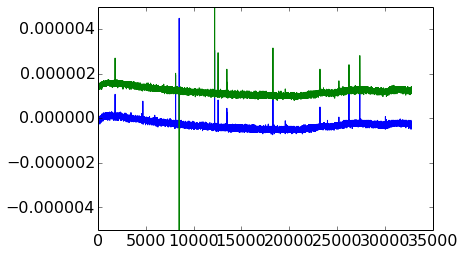

In [28]:
plot(x[::1024])
plot(x1[::1024])
ylim(-5e-6,5e-6)

In [29]:
import kid_readout.analysis.cross_spectrum

In [30]:
csa = kid_readout.analysis.cross_spectrum.CrossSpectralAnalysis()

In [31]:
csa.get_data_directly(x,x1)

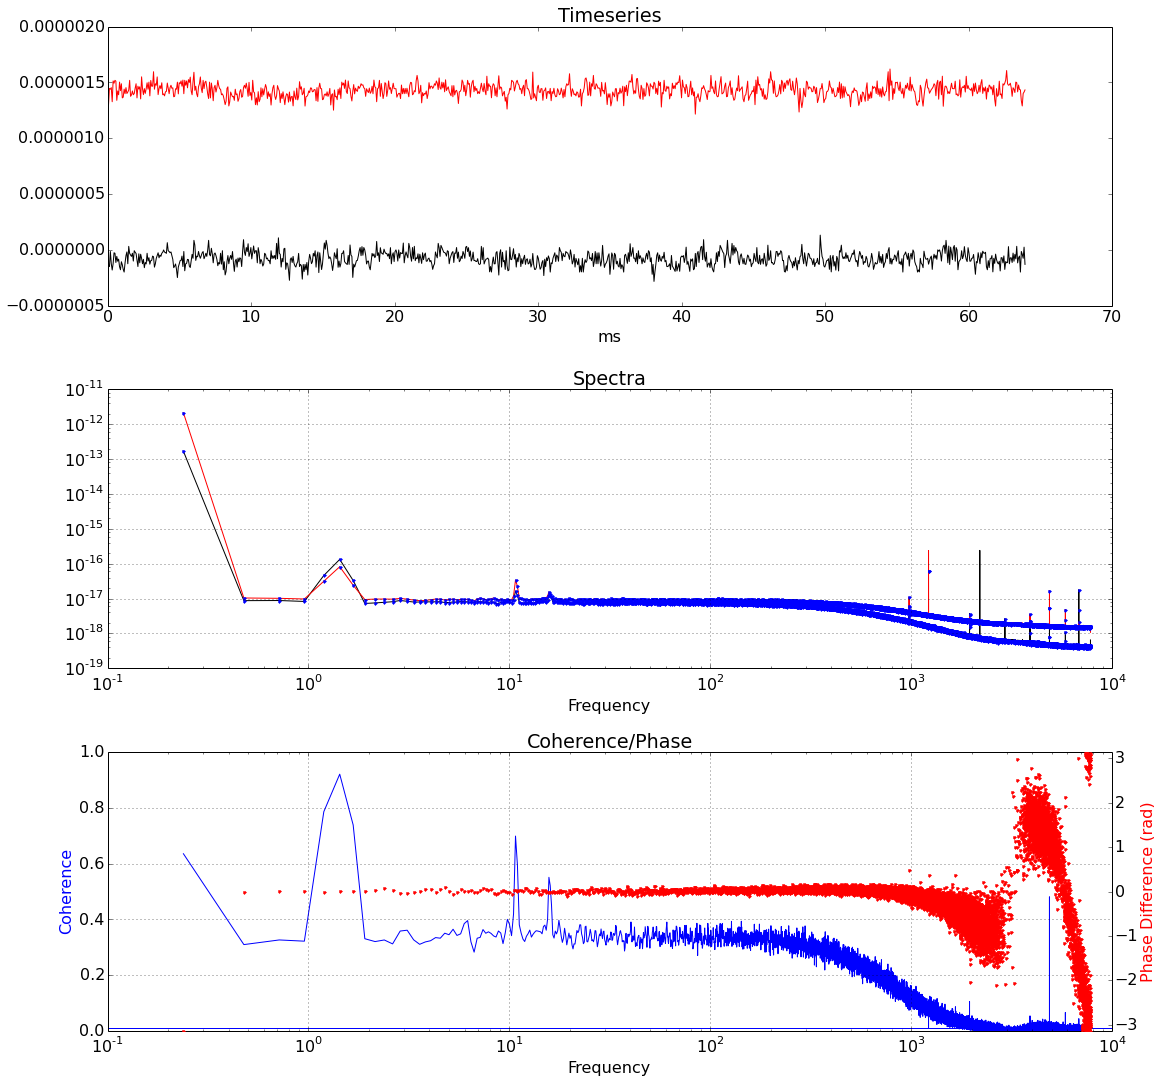

In [32]:
csa.plot()

(0.1, 10)

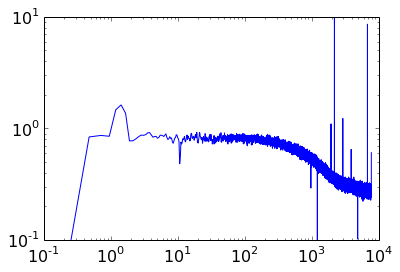

In [33]:
loglog(csa.freq,csa.pxx1/np.abs(csa.pxx2))
ylim(.1,10)

In [35]:
import kid_readout.utils.despike

In [36]:
xds = kid_readout.utils.despike.deglitch_window(x,2**12)

/home/gjones/kid_readout/kid_readout/utils/fftfilt.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i:k] = y[i:k] + yt[:k-i]            # and add


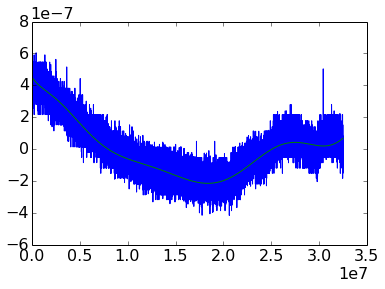

In [37]:
y = xds[2**20:]
y = y - y.mean()
t = np.arange(len(y))
pcoeff = np.polyfit(t[::2**15],y[::2**15],9)
plot(t[::1024],y[::1024])
plot(t[::1024],np.polyval(pcoeff,t[::1024]))

In [42]:
polysub=y - np.polyval(pcoeff,t)

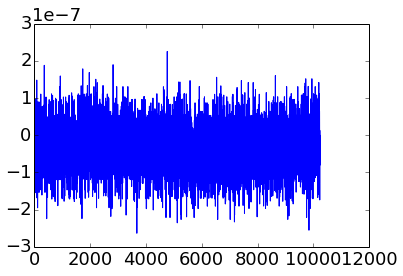

In [47]:
plot(polysub[:10240])

In [43]:
polysub_pxx,polysub_fr = mlab.psd(polysub,NFFT=2**20,Fs=256e6/2**14)

In [38]:
pxx,fr = mlab.psd(xds[2**20:]-xds[2**20:].mean(),NFFT=2**20,Fs=256e6/2**14)

In [39]:
rcParams['font.size']=18

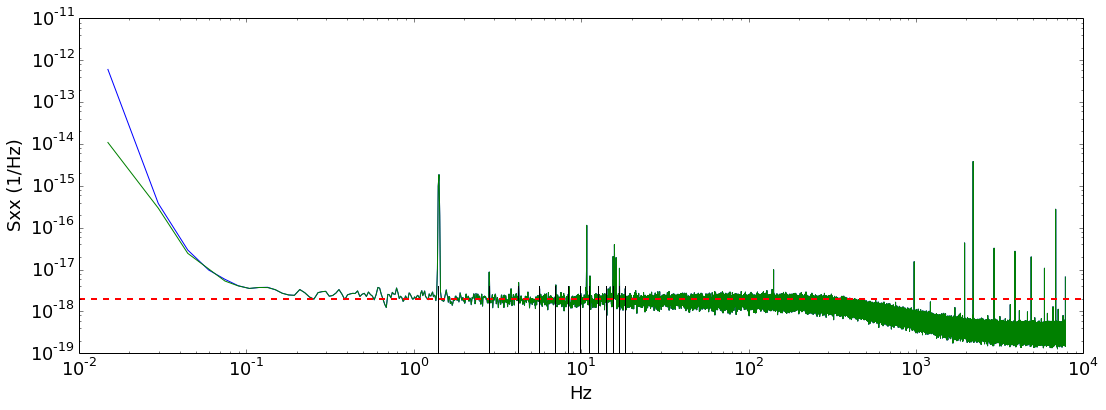

In [48]:
figure(figsize=(18,6))
loglog(fr,pxx)
loglog(polysub_fr,polysub_pxx)
#ylim(1e-19,1e-16)
gca().axhline(2e-18,color='r',linestyle='--',lw=2)
for k in range(14):
    gca().axvline(k*1.4,ymax=0.2,color='k')
ylabel('Sxx (1/Hz)')
xlabel('Hz')
#loglog(pkl.pca_freq,pkl.pca_eigvals[1,:])
#xscale('linear')
#savefig('/home/gjones/paper_plots/2015-09-29-noise-spectrum-to-0.1-Hz.pdf',bbox_inches='tight')

(1e-19, 1e-16)

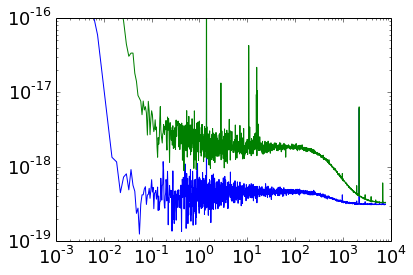

In [41]:
for pkl in pkls[:1]:
    loglog(pkl.pca_freq,pkl.pca_eigvals.T)
ylim(1e-19,1e-16)